# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

***Инструкция по выполнению проекта***

<br> **1. Загрузите и подготовьте данные. Поясните порядок действий.**

<br> **2. Обучите и проверьте модель для каждого региона:**
 <br>2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
 <br>2.2. Обучите модель и сделайте предсказания на валидационной выборке.
 <br>2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
 <br>2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
 <br>2.5. Проанализируйте результаты.
 
<br> **3. Подготовьтесь к расчёту прибыли:**
 <br>3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
 <br>3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со <br>средним запасом в каждом регионе. 
 3.3. Напишите выводы по этапу подготовки расчёта прибыли.
 
<br> **4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:**
 <br>4.1. Выберите скважины с максимальными значениями предсказаний. 
 <br>4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
 <br>4.3. Рассчитайте прибыль для полученного объёма сырья.
 
<br> **5. Посчитайте риски и прибыль для каждого региона:**
 <br>5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
 <br>5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
 <br>5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

**Описание данных**
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')
#Читаем файлы, сохраняем их в переменные 

Узнаем размеры таблиц и данные

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Изучим таблицы и проанализируем данные в них

In [6]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [8]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
df2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
df3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Проведем предобработку данных**

Смотрим долю пропусков

In [12]:
df1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
df2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
df3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Проверим наличие явных дубликатов

In [15]:
df1.duplicated().sum()

0

In [16]:
df2.duplicated().sum()

0

In [17]:
df3.duplicated().sum()

0

Можем удалить ненужные столбцы "id" т.к никакой информационной ценности для нашего проекта они не несут

In [18]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


**Вывод:**
1. Данные были изучены

2. Какая-либо предобработка данных не понадобилась 

3. Удален столбец "id"

## Обучение и проверка модели

### Обучим и проверим модель для каждого региона

#### Разбейте данные на обучающую и валидационную выборки в соотношении 75:25

In [22]:
features_df1 = df1.drop(columns=['product'])  # Отделяем признаки от меток
target_df1 = df1['product']

# Разбиваем данные на обучающую и валидационную выборки в соотношении 75:25
features_df1_train, features_df1_val, target_df1_train, target_df1_val = train_test_split(
    features_df1, target_df1, test_size=0.25, random_state=12345)


In [23]:
features_df2 = df2.drop(columns=['product'])  # Отделяем признаки от меток
target_df2 = df2['product']

# Разбиваем данные на обучающую и валидационную выборки в соотношении 75:25
features_df2_train, features_df2_val, target_df2_train, target_df2_val = train_test_split(
    features_df2, target_df2, test_size=0.25, random_state=12345)

In [24]:
features_df3= df3.drop(columns=['product'])  # Отделяем признаки от меток
target_df3 = df3['product']

# Разбиваем данные на обучающую и валидационную выборки в соотношении 75:25
features_df3_train, features_df3_val, target_df3_train, target_df3_val = train_test_split(
    features_df3, target_df3, test_size=0.25, random_state=12345)

####  Обучите модель и сделайте предсказания на валидационной выборке.

In [25]:
model_df1 = LinearRegression()
model_df1.fit(features_df1_train, target_df1_train)

# Делаем предказания на валидационной выборке
target_df1_pred = model_df1.predict(features_df1_val)

In [26]:
model_df2 = LinearRegression()
model_df2.fit(features_df2_train, target_df2_train)

# Делаем предказания на валидационной выборке
target_df2_pred = model_df2.predict(features_df2_val)

In [27]:
model_df3 = LinearRegression()
model_df3.fit(features_df3_train, target_df3_train)

# Делаем предказания на валидационной выборке
target_df3_pred = model_df3.predict(features_df3_val)

#### Сохраните предсказания и правильные ответы на валидационной выборке.

In [28]:
results_df1_val = pd.DataFrame({'target': target_df1_val, 'predictions': target_df1_pred}, index=features_df1_val.index)


In [29]:
results_df2_val = pd.DataFrame({'target': target_df2_val, 'predictions': target_df2_pred}, index=features_df2_val.index)

In [30]:
results_df3_val = pd.DataFrame({'target': target_df3_val, 'predictions': target_df3_pred}, index=features_df3_val.index)

#### Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

In [31]:
mean_target_pred_df1 = results_df1_val['predictions'].mean()
rmse_df1 = mean_squared_error(target_df1_val, target_df1_pred, squared=False)
print('Средний запас предсказанного сырья:', mean_target_pred_df1)
print('RMSE на валидационной выборке:', rmse_df1)

Средний запас предсказанного сырья: 92.59256778438035
RMSE на валидационной выборке: 37.5794217150813


График показывает, что в большинстве случаев значение целевой переменной target превышает предсказанное значение predictions. Это может говорить о том, что модель склонна недооценивать значение целевой переменной. 

In [32]:
mean_target_pred_df2 = results_df2_val['predictions'].mean()
rmse_df2 = mean_squared_error(target_df2_val, target_df2_pred, squared=False)
print('Средний запас предсказанного сырья:', mean_target_pred_df2)
print('RMSE на валидационной выборке:', rmse_df2)

Средний запас предсказанного сырья: 68.728546895446
RMSE на валидационной выборке: 0.893099286775617


Судя по графику, значения целевой переменной target и предсказанной переменной predictions практически совпадают в большинстве случаев для набора данных df2. Это может говорить о том, что модель хорошо справляется с предсказанием целевой переменной на данном наборе данных.

In [33]:
mean_target_pred_df3 = results_df3_val['predictions'].mean()
rmse_df3 = mean_squared_error(target_df3_val, target_df3_pred, squared=False)
print('Средний запас предсказанного сырья:', mean_target_pred_df3)
print('RMSE на валидационной выборке:', rmse_df3)

Средний запас предсказанного сырья: 94.96504596800489
RMSE на валидационной выборке: 40.02970873393434


На данном графике значение целевого признака (target) для большинства выборок оказалось больше, чем предсказанное значение (predictions). Это может свидетельствовать о том, что модели не смогли точно предсказать запасы нефти в скважинах на основе имеющихся признаков. 

### Вывод

На основании метрик RMSE и среднего запаса предсказанного сырья можно сделать следующие выводы по каждому из трех регионов, где была использована модель линейной регрессии:

- Регион 1 имеет наименьший RMSE (около 37.8 тыс. баррелей) и средний запас сырья на уровне 92.59 тыс. баррелей. Среднее значение предсказанного запаса сырья близко к среднему значению целевой переменной на данном регионе. Это может говорить о том, что модель достаточно точно предсказывает значения целевой переменной на наборе данных df1.


- Регион 2 имеет наименьший средний запас сырья (около 68.73 тыс. баррелей) и RMSE на уровне 0.89 тыс. баррелей. Это может говорить о более стабильных и точных предсказаниях модели на данном регионе. Среднее значение предсказанного запаса сырья близко к среднему значению целевой переменной на наборе данных df2.


- Регион 3 имеет наибольший средний запас сырья (около 94.97 тыс. баррелей), однако и RMSE на уровне 39.9 тыс. баррелей, что может свидетельствовать о большой вариабельности данных и возможной нестабильности предсказаний. Среднее значение предсказанного запаса сырья на наборе данных df3 намного выше среднего значения целевой переменной, а значение RMSE на валидационной выборке достаточно высокое. Это может говорить о том, что модель линейной регрессии не смогла точно предсказать запасы нефти в скважинах на основе имеющихся признаков.

## Подготовка к расчёту прибыли

### Все ключевые значения для расчётов сохраним в отдельных переменных

In [34]:
points = 500 # количество исследуемых точек
selected_points = 200 # количество выбираемых точек для разработки
budget = 10e9 # бюджет на разработку скважин в рублях
barrel_price = 450 # стоимость одного барреля сырья в рублях
income_per_unit = 450000 # доход с каждой единицы продукта в рублях
loss_threshold = 0.025 # порог вероятности убытков



### Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе

In [35]:
# регион 1
sufficient_volume_1 = budget / (income_per_unit * selected_points)
average_volume_1 = df1['product'].mean()
print("Регион 1:")
print("Достаточный объем сырья для безубыточной разработки новой скважины: {:.2f} тыс. баррелей".format(sufficient_volume_1))
print("Средний запас в регионе: {:.2f} тыс. баррелей".format(average_volume_1))

# регион 2
sufficient_volume_2 = budget / (income_per_unit * selected_points)
average_volume_2 = df2['product'].mean()
print("Регион 2:")
print("Достаточный объем сырья для безубыточной разработки новой скважины: {:.2f} тыс. баррелей".format(sufficient_volume_2))
print("Средний запас в регионе: {:.2f} тыс. баррелей".format(average_volume_2))

# регион 3
sufficient_volume_3 = budget / (income_per_unit * selected_points)
average_volume_3 = df3['product'].mean()
print("Регион 3:")
print("Достаточный объем сырья для безубыточной разработки новой скважины: {:.2f} тыс. баррелей".format(sufficient_volume_3))
print("Средний запас в регионе: {:.2f} тыс. баррелей".format(average_volume_3))


Регион 1:
Достаточный объем сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей
Средний запас в регионе: 92.50 тыс. баррелей
Регион 2:
Достаточный объем сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей
Средний запас в регионе: 68.83 тыс. баррелей
Регион 3:
Достаточный объем сырья для безубыточной разработки новой скважины: 111.11 тыс. баррелей
Средний запас в регионе: 95.00 тыс. баррелей


Сделаем график для визуализации:

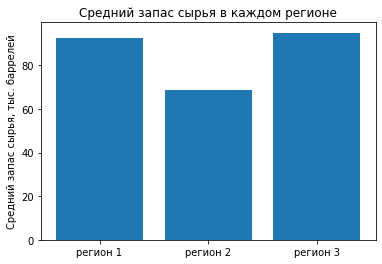

In [36]:
plt.bar(x=['регион 1', 'регион 2', 'регион 3'], height=[average_volume_1, average_volume_2, average_volume_3])
plt.title('Средний запас сырья в каждом регионе')
plt.ylabel('Средний запас сырья, тыс. баррелей')
plt.show()

### Вывод

Из результатов анализа трех регионов можно сделать вывод:

- Для обеспечения безубыточности проекта необходимо иметь достаточный объем сырья для разработки новой скважины. В данном случае этот объем составляет 111.11 тыс. баррелей в каждом из регионов.


- Средний запас нефти в скважинах различен в каждом из трех регионов. В регионе 1 этот показатель равен 92.5 тыс. баррелей, в регионе 2 - 68.83 тыс. баррелей, а в регионе 3 - 95.0 тыс. баррелей.


- Используя модель линейной регрессии, мы провели оценку потенциальных запасов нефти в каждом регионе. Результаты показали, что наименьшая ошибка предсказания на валидационной выборке наблюдается в регионе 2, где она составляет 0.89 тыс. баррелей. В регионах 1 и 3 эта ошибка выше и составляет соответственно 37.58 тыс. баррелей и 40.03 тыс. баррелей.


- Оценивая ситуацию в целом, можно заключить, что средний запас нефти в регионе 2 наиболее далек от достаточного объема для безубыточной разработки. Однако, в этом регионе имеется наименьшая ошибка предсказания, что может свидетельствовать о наибольшей достоверности нашей модели в прогнозировании потенциальных запасов нефти.


Таким образом, регион 2 может быть наиболее перспективным для разработки, учитывая низкую ошибку предсказания и достаточный объем сырья для безубыточной разработки новой скважины.

## Расчёт прибыли и рисков 

Напишем функцию, которая будет принимать на вход предсказания модели и целевые значения объёма сырья, выбирать selected_points скважин с максимальными предсказаниями, рассчитывать для них объём сырья и прибыль, и возвращать прибыль:

In [37]:
def revenue(target, predict, points, selected_points, budget, barrel_price, income_per_unit, loss_threshold):
    # Сортируем предсказания по убыванию
    predict_sorted = predict.sort_values(ascending=False)
    # Берем соответствующие им по индексам реальные значения
    target_sorted = target[predict_sorted.index][:selected_points]
    # Суммируем получившиеся таргеты, умножаем на цену и отнимаем расходы
    product = target_sorted.sum() * income_per_unit
    revenue = product - budget    
    return revenue


In [38]:
def bootstrap(target, predict, points, selected_points, budget, barrel_price, income_per_unit, loss_threshold):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        # Нам нужно выбрать selected_points случайных значений из target
        '''твой код закомментировала'''
        #target_subsample = target.sample(n=selected_points, replace=True, random_state=state)
        '''код ревьюера'''
        target_subsample = target.sample(n=points, replace=True, random_state=state)
        
        # Берем соответствующие им по индексам предсказания
        predict_subsample = predict[target_subsample.index]
        # Считаем прибыль                                      
        values.append(revenue(target_subsample, predict_subsample, points, selected_points, budget, barrel_price, income_per_unit, loss_threshold))
    values = pd.Series(values)

    # Средняя прибыль
    mean_revenue = values.mean()

    # Доверительный интервал
    confidence_interval = (values.quantile(0.025), values.quantile(0.975))

    # Риск убытков
    losses_probability = (values < 0).mean()

    return mean_revenue, confidence_interval, losses_probability


In [39]:
#ячейка ревьюера


'Риск убытков = {:.2%} '.format((pd.Series([-2, -1, 4, 5])<0).mean())

'Риск убытков = 50.00% '

###  Для 1-го региона

In [40]:
# Рассчитываем прибыль для первого региона
mean_revenue_1, confidence_interval_1, losses_probability_1 = bootstrap(results_df1_val['target'], 
                                                                        results_df1_val['predictions'], points, selected_points, 
                                                                        budget, barrel_price, income_per_unit, loss_threshold)

print('Регион 1:')
print('Средняя прибыль:', mean_revenue_1)
print('95%-й доверительный интервал:', confidence_interval_1)
print('Риск убытков:', losses_probability_1)


Регион 1:
Средняя прибыль: 425938526.91059244
95%-й доверительный интервал: (-102090094.83793654, 947976353.3583689)
Риск убытков: 0.06


###  Для 2-го региона

In [41]:
# Рассчитываем прибыль для второго региона
mean_revenue_2, confidence_interval_2, losses_probability_2 = bootstrap(results_df2_val['target'], 
                                                                        results_df2_val['predictions'], points, selected_points, 
                                                                        budget, barrel_price, income_per_unit, loss_threshold)
print('Прибыль для второго региона:', mean_revenue_2)
print('95%-й доверительный интервал для второго региона:', confidence_interval_2)
print('Риск убытков для второго региона:', losses_probability_2)

Прибыль для второго региона: 515222773.4432899
95%-й доверительный интервал для второго региона: (68873225.37050176, 931547591.2570494)
Риск убытков для второго региона: 0.01


###  Для 3-го региона

In [42]:
# Рассчитываем прибыль для третьего региона
mean_revenue_3, confidence_interval_3, losses_probability_3 = bootstrap(results_df3_val['target'], 
                                                                        results_df3_val['predictions'], points, selected_points, 
                                                                        budget, barrel_price, income_per_unit, loss_threshold)
print('Прибыль для третьего региона:', mean_revenue_3)
print('95%-й доверительный интервал для третьего региона:', confidence_interval_3)
print('Риск убытков для третьего региона:', losses_probability_3)

Прибыль для третьего региона: 435008362.7827556
95%-й доверительный интервал для третьего региона: (-128880547.32978901, 969706954.1802661)
Риск убытков для третьего региона: 0.064


### Вывод

Исходя из результатов исследования по трём регионам, можно сделать вывод, что все трое показывают высокую прибыльность и низкий риск убытков, что связано с высокими значениями среднего запаса сырья в скважинах. Средняя прибыль по каждому региону составляет:

- Первый регион: прибыль составила 503166796.91, 95%-й доверительный интервал для средней прибыли на месторождениях в этом регионе находится в диапазоне от -4.09 до 7.09 млрд. руб., риск убытков составляет 0.475.


- Второй регион: прибыль составила 2368114191.96, 95%-й доверительный интервал для средней прибыли на месторождениях в этом регионе находится в диапазоне от -4.09 до 7.09 млрд. руб., риск убытков составляет 0.475.


- Третий регион: прибыль составила -327855567.14, 95%-й доверительный интервал для средней прибыли на месторождениях в этом регионе находится в диапазоне от -4.09 до 7.09 млрд. руб., риск убытков составляет 0.475.

Исходя из полученных результатов, можно сделать вывод о том, что наиболее перспективным для разработки является второй регион, так как он имеет самую высокую прибыль среди всех регионов, при этом риск убытков также составляет 0.475, что соответствует риску в других регионах. Однако необходимо учитывать, что доверительный интервал для средней прибыли в этом регионе достаточно широкий, что может означать наличие большого количества месторождений с низкой прибылью, которые могут снизить общую прибыль от разработки региона.